# K-Means Clustering Implementation

This notebook demonstrates the implementation of K-means clustering algorithm with:
1. Data preprocessing and exploration
2. Finding optimal number of clusters using elbow method
3. K-means clustering implementation with K-means++ initialization
4. Visualization and analysis of results

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

In [8]:
# Load and examine the data
try:
    data = pd.read_csv('Mall_Customers.csv')
    print("Dataset Shape:", data.shape)
    print("\nFirst few rows:")
    display(data.head())
    print("\nData Info:")
    display(data.info())
except Exception as e:
    print(f"Error loading data: {e}")

Dataset Shape: (200, 5)

First few rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

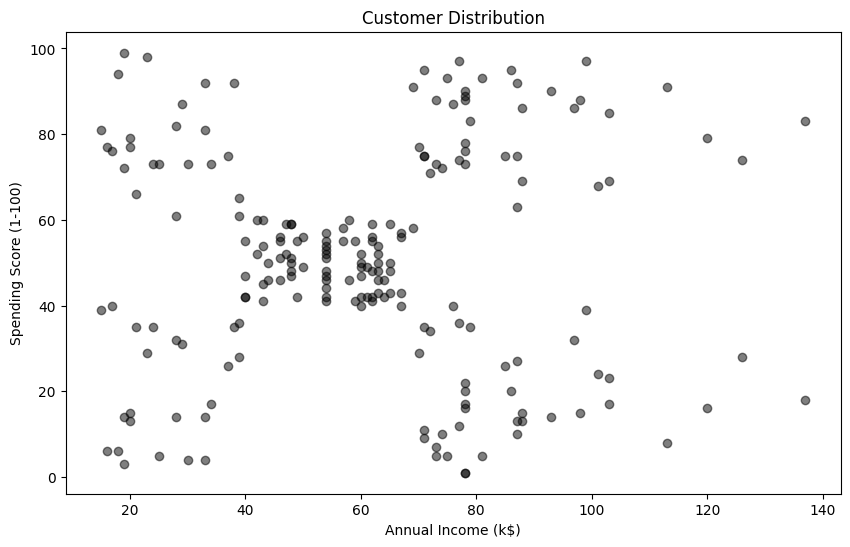

In [9]:
# Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize original data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='black', alpha=0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

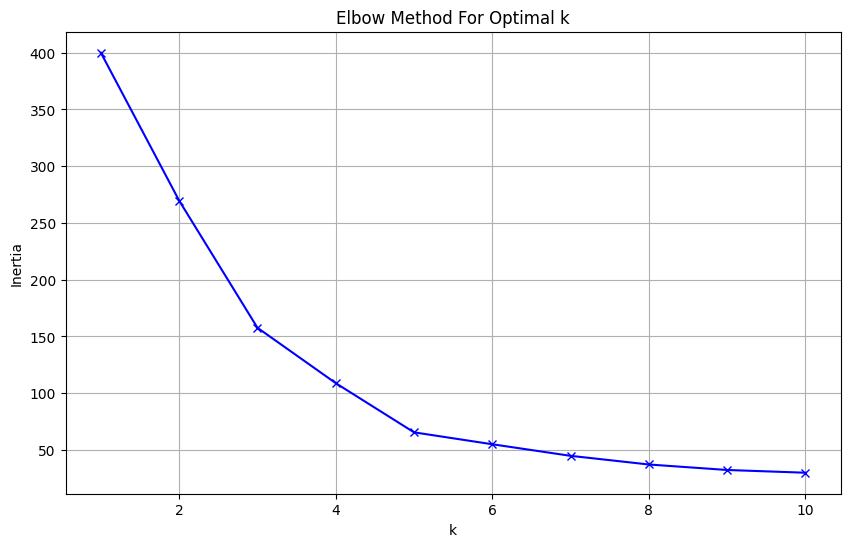

In [10]:
# Implement elbow method
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

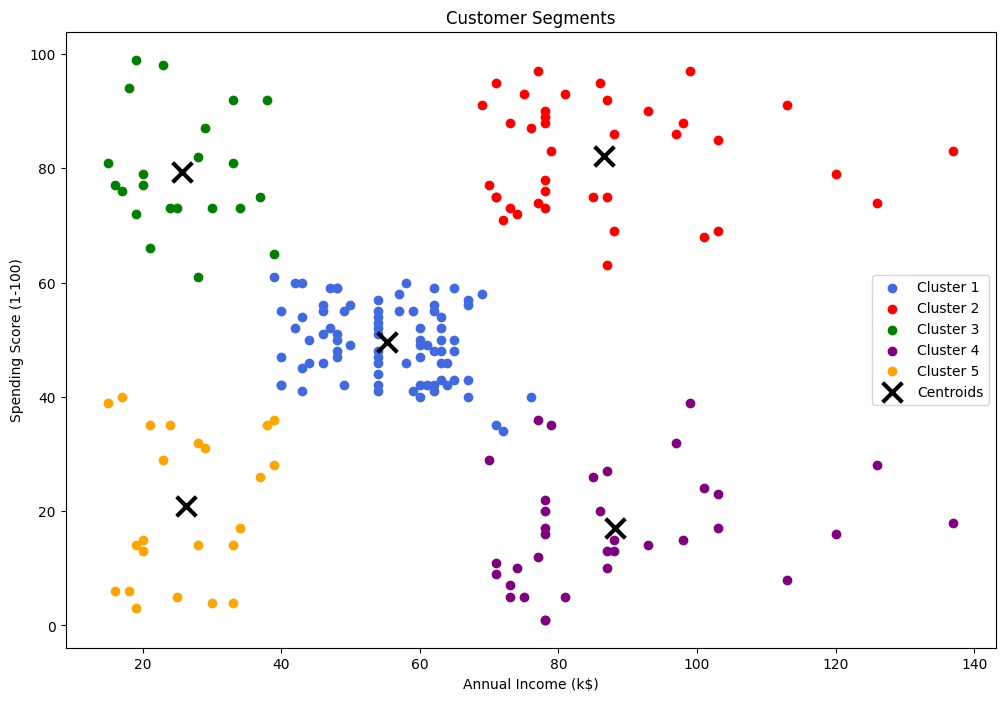

In [11]:
# Implement K-means clustering with optimal k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(12, 8))
colors = ['royalblue', 'red', 'green', 'purple', 'orange']

for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], 
                cluster_data['Spending Score (1-100)'],
                c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='black', marker='x', s=200, linewidths=3, 
            label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [12]:
# Add cluster labels to original data
data['Cluster'] = clusters

# Analyze clusters
print("\nCluster Sizes:")
print(data['Cluster'].value_counts())

print("\nCluster Means:")
print(data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())


Cluster Sizes:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Cluster Means:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
